Importing Libraries and ascent picture

In [4]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

Displaying The Picture

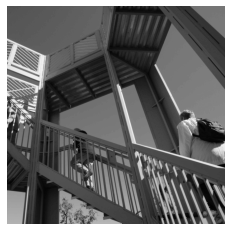

In [7]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

Storing the dimension of picture in size_x, size_y and making a copy of picture (i.e i_transformed)

In [15]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [16]:
size_x

512

In [17]:
size_y

512

First, make a convolution matrix (or kernel) as a 3x3 array:

In [18]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight  = 1

Now, calculate the output pixels

In [19]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

Now, plot the image to see the effect of passing the filter over it:

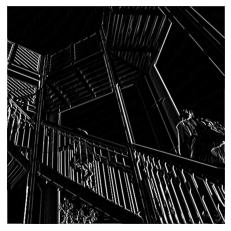

In [21]:
plt.gray()
plt.axis('off')
plt.grid(False)
plt.imshow(i_transformed)
plt.show()   

The following code will show a (2, 2) pooling

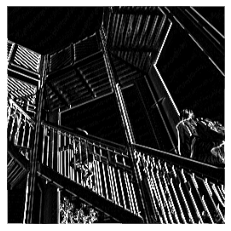

In [23]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.axis('off')
plt.show()
